# Diabetes Prediction 

In [3]:
!pip install missingno

  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

import missingno as msno

In [3]:
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\datasets_228_482_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.size

6912

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
features = df.columns

cols = (df[features]==0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,True,True,True,False,True
1,True,True,True,False,True
2,True,True,False,False,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
763,True,True,True,True,True
764,True,True,True,False,True
765,True,True,True,True,True
766,True,True,False,False,True


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

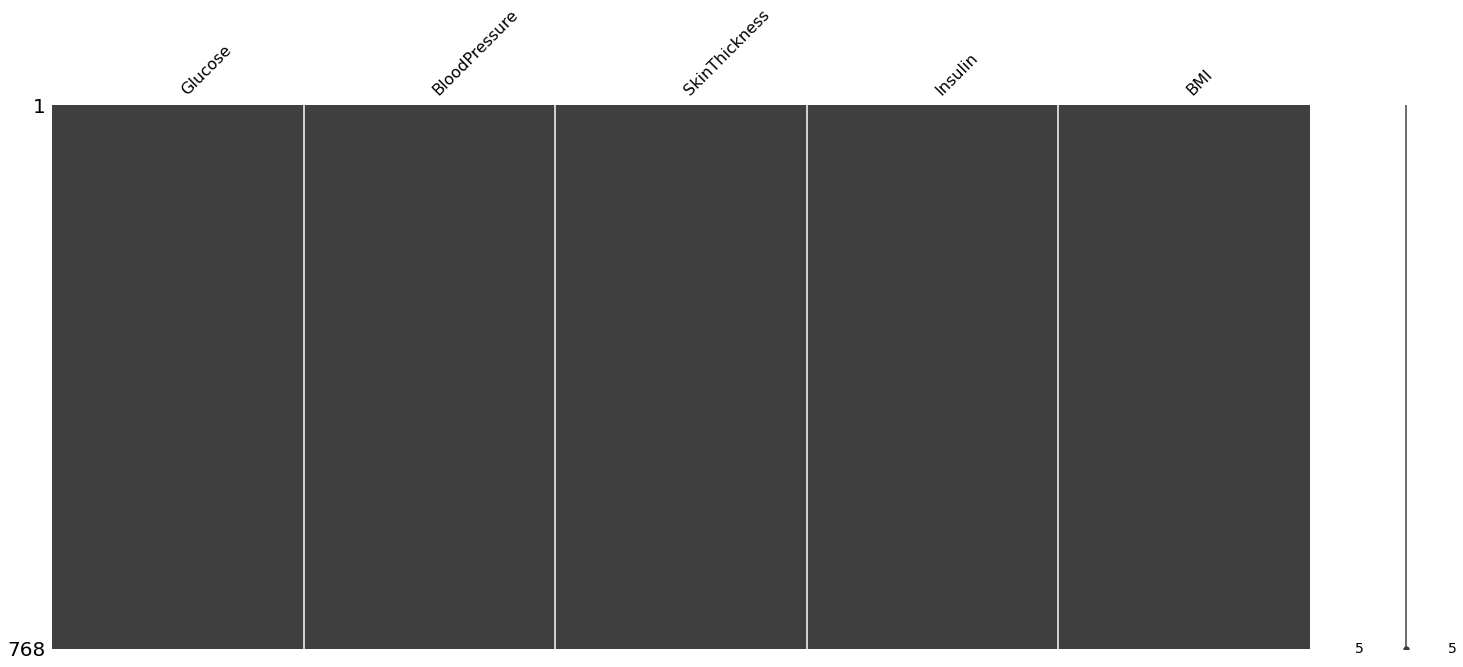

In [14]:
msno.matrix(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [15]:
df['Glucose'].fillna(df['Glucose'].median(), inplace= True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace= True)
df['BMI'].fillna(df['BMI'].median(), inplace= True)

In [16]:
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)


In [17]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

In [18]:
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [19]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace= True)

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

ValueError: incomplete format

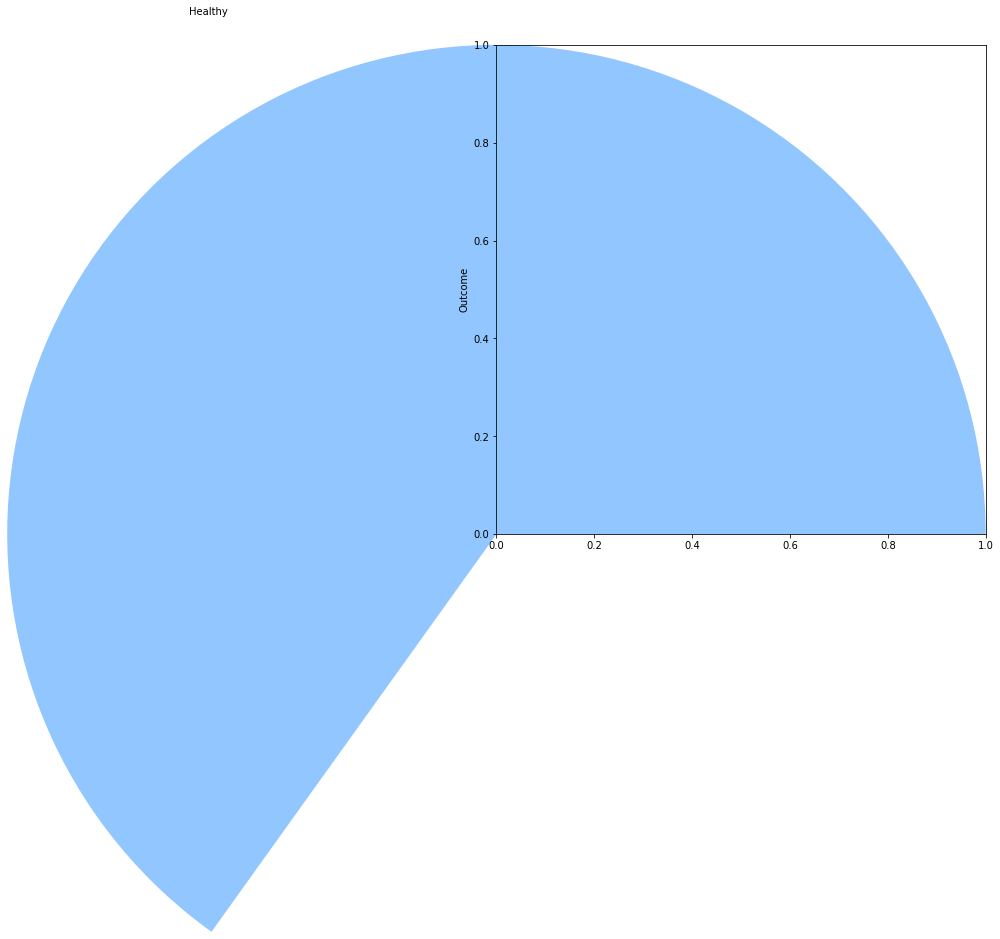

In [21]:
import matplotlib.style as style
style.available


style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie', labels = labels, subplots=True, autopct='%1.0f%', labeldistance=1.2, figsize= (9,9))

array([<AxesSubplot:ylabel='Outcome'>], dtype=object)

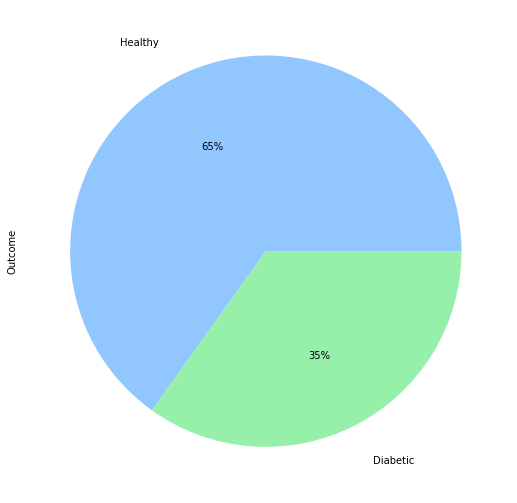

In [22]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

<AxesSubplot:title={'center':'BloodPressure'}>

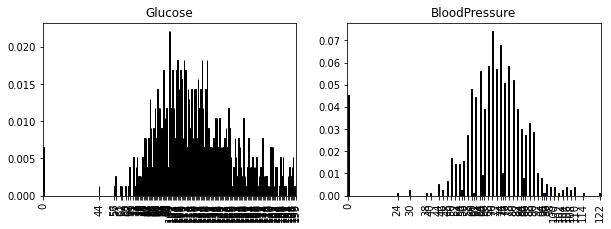

In [23]:
plt.figure(figsize= (10,7))
plt.subplot(221)
df['Glucose'].value_counts(normalize=True).plot.bar(color= ['magenta', 'orange'],edgecolor= 'black', title= 'Glucose')
plt.subplot(222)
df['BloodPressure'].value_counts(normalize=True).plot.bar(color= ['red', 'blue'], edgecolor= 'black', title= 'BloodPressure')

Sample of Diabetic people:  268
Sample of Healthy people: 500


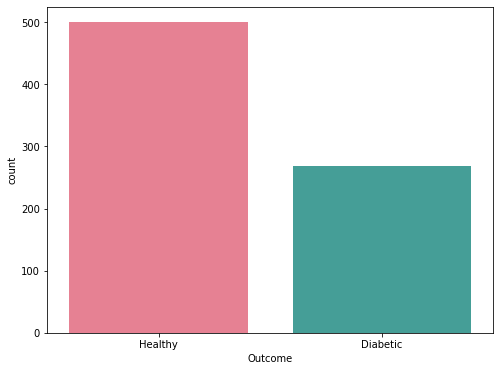

In [26]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x=df['Outcome'], data=df, palette= 'husl')
ax.set_xticklabels(['Healthy', 'Diabetic'])
healthy, Diabetics = df['Outcome'].value_counts().values
print("Sample of Diabetic people: ", Diabetics)
print("Sample of Healthy people:", healthy)

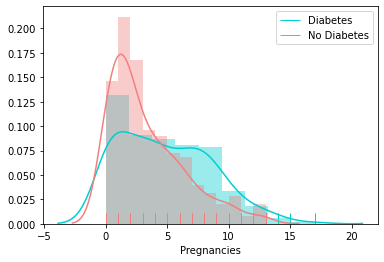

In [28]:
plt.figure()

ax = sns.distplot(df['Pregnancies'][df.Outcome == 1], color = "darkturquoise", rug = True)
sns.distplot(df['Pregnancies'][df.Outcome == 0], color = "lightcoral", rug= True)
plt.legend(['Diabetes', 'No Diabetes'])

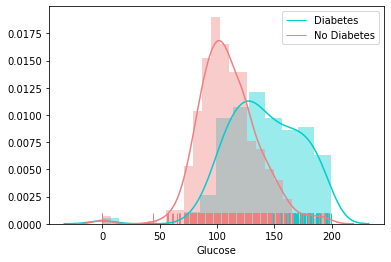

In [30]:
plt.figure()
ax = sns.distplot(df['Glucose'][df.Outcome == 1], color = 'darkturquoise', rug = True)
sns.distplot(df['Glucose'][df.Outcome == 0], color= 'lightcoral', rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

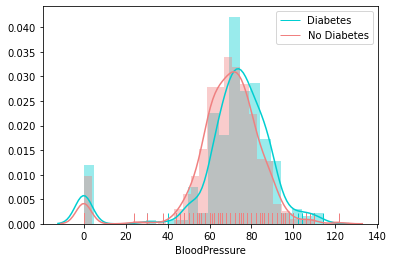

In [34]:
plt.figure()
ax = sns.distplot(df['BloodPressure'][df.Outcome == 1], color = "darkturquoise", rug = True)
sns.distplot(df['BloodPressure'][df.Outcome == 0], color = "lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

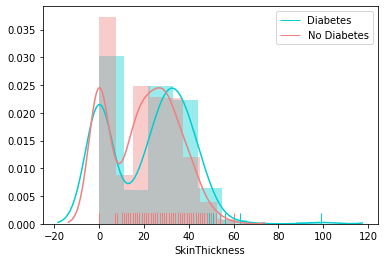

In [39]:
plt.figure()
ax = sns.distplot(df['SkinThickness'][df.Outcome == 1], color = 'darkturquoise', rug = True)
sns.distplot(df['SkinThickness'][df.Outcome == 0], color = 'lightcoral', rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

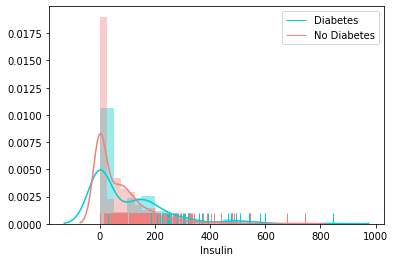

In [40]:
plt.figure()
ax = sns.distplot(df['Insulin'][df.Outcome == 1], color = 'darkturquoise', rug =True)
sns.distplot(df['Insulin'][df.Outcome == 0], color = 'lightcoral', rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

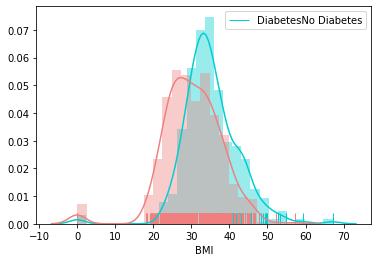

In [42]:
plt.figure()
ax = sns.distplot(df['BMI'][df.Outcome == 1], color= 'darkturquoise', rug = True)
sns.distplot(df['BMI'][df.Outcome == 0], color = 'lightcoral', rug = True)
plt.legend(['Diabetes' 'No Diabetes'])

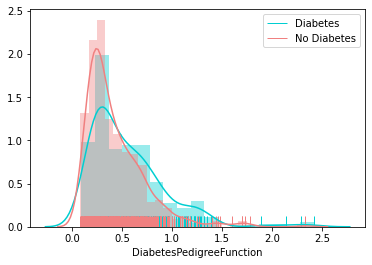

In [43]:
plt.figure()
ax = sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 1], color = 'darkturquoise', rug = True)
sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 0], color = 'lightcoral', rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

No handles with labels found to put in legend.


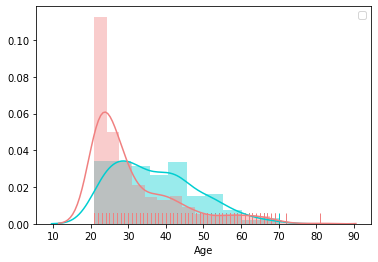

In [46]:
plt.figure()
ax = sns.distplot(df['Age'][df.Outcome == 1], color = 'darkturquoise', rug = True)
sns.distplot(df['Age'][df.Outcome == 0], color = 'lightcoral', rug = True)
plt.legend()

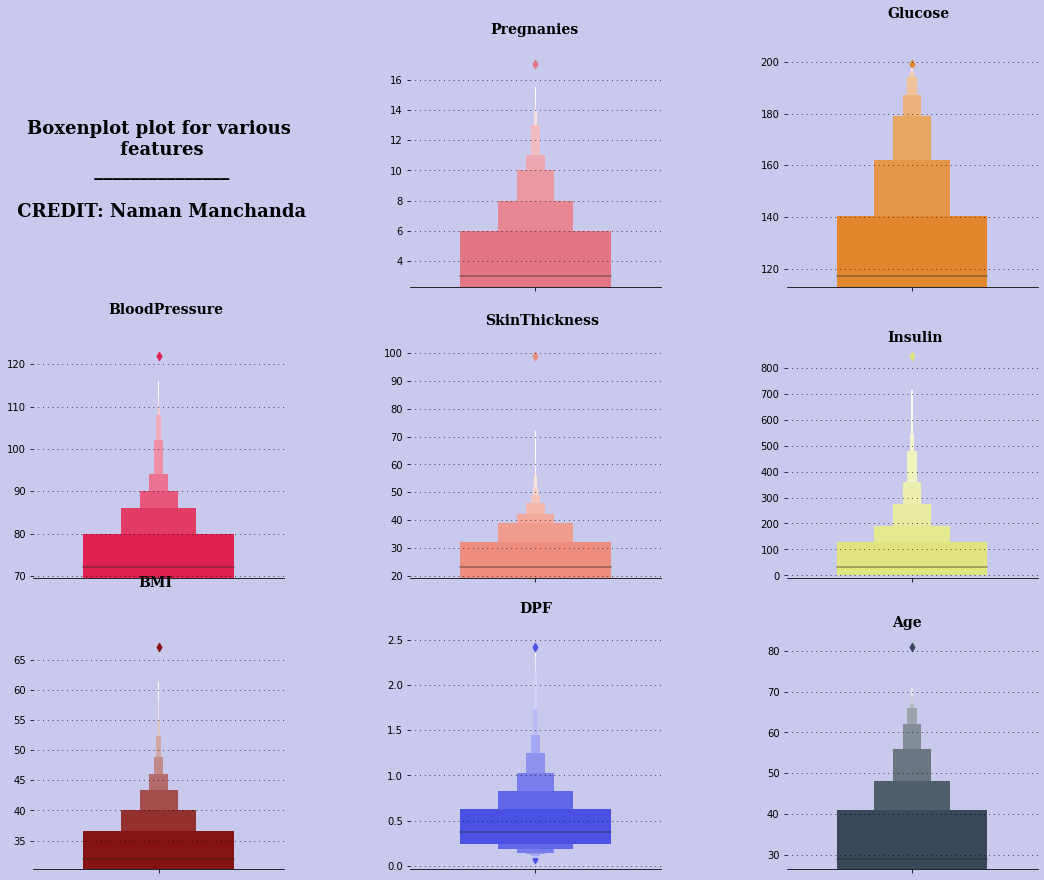

In [54]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])


background_color = "#c9c9ee"

color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)


ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
        'Boxenplot plot for various\n features\n _______________\n\n CREDIT: Naman Manchanda',
        horizontalalignment='center',
        verticalalignment= 'center',
        fontsize=18, fontweight='bold',
        fontfamily= 'serif',
        color = "#000000")


#Pregnancies
ax1.text(-0.18, 19, 'Pregnanies', fontsize=14, fontfamily= 'serif', fontweight='bold', color= "#000000")
ax1.grid(color= '#000000', linestyle = ':', axis= 'y', zorder = 0, dashes = (1,5))
sns.boxenplot(ax= ax1, y=df['Pregnancies'], palette=  ["#f56476"], width= 0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose 
ax2.text(-0.1, 217, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['Glucose'],palette=["#ff8811"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure 
ax3.text(-0.20, 132, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['BloodPressure'],palette=["#ff0040"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness 
ax4.text(-.2, 110, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['SkinThickness'],palette=["#ff7f6c"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin 
ax5.text(-0.10, 900, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Insulin'],palette=["#f0f66e"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI 
ax6.text(-0.08, 77, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,y=df['BMI'],palette=["#990000"],width=0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF 
ax7.text(-0.065, 2.8, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=df['DiabetesPedigreeFunction'],palette=["#3339FF"],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age 
ax8.text(-0.08, 86, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,y=df['Age'],palette=["#34495E"],width=0.6)
ax8.set_xlabel("")
ax8.set_ylabel("")



for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)


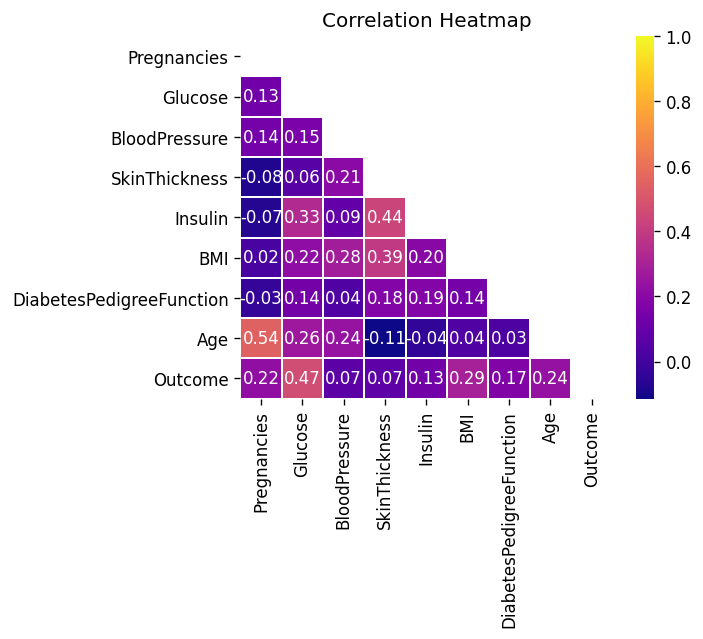

In [55]:
plt.figure(dpi = 120, figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(), dtype= bool))
sns.heatmap(df.corr(), mask= mask, fmt = ".2f", annot= True, lw =1, cmap= 'plasma')
plt.yticks(rotation =0)
plt.xticks(rotation =90)
plt.title('Correlation Heatmap')
plt.show()

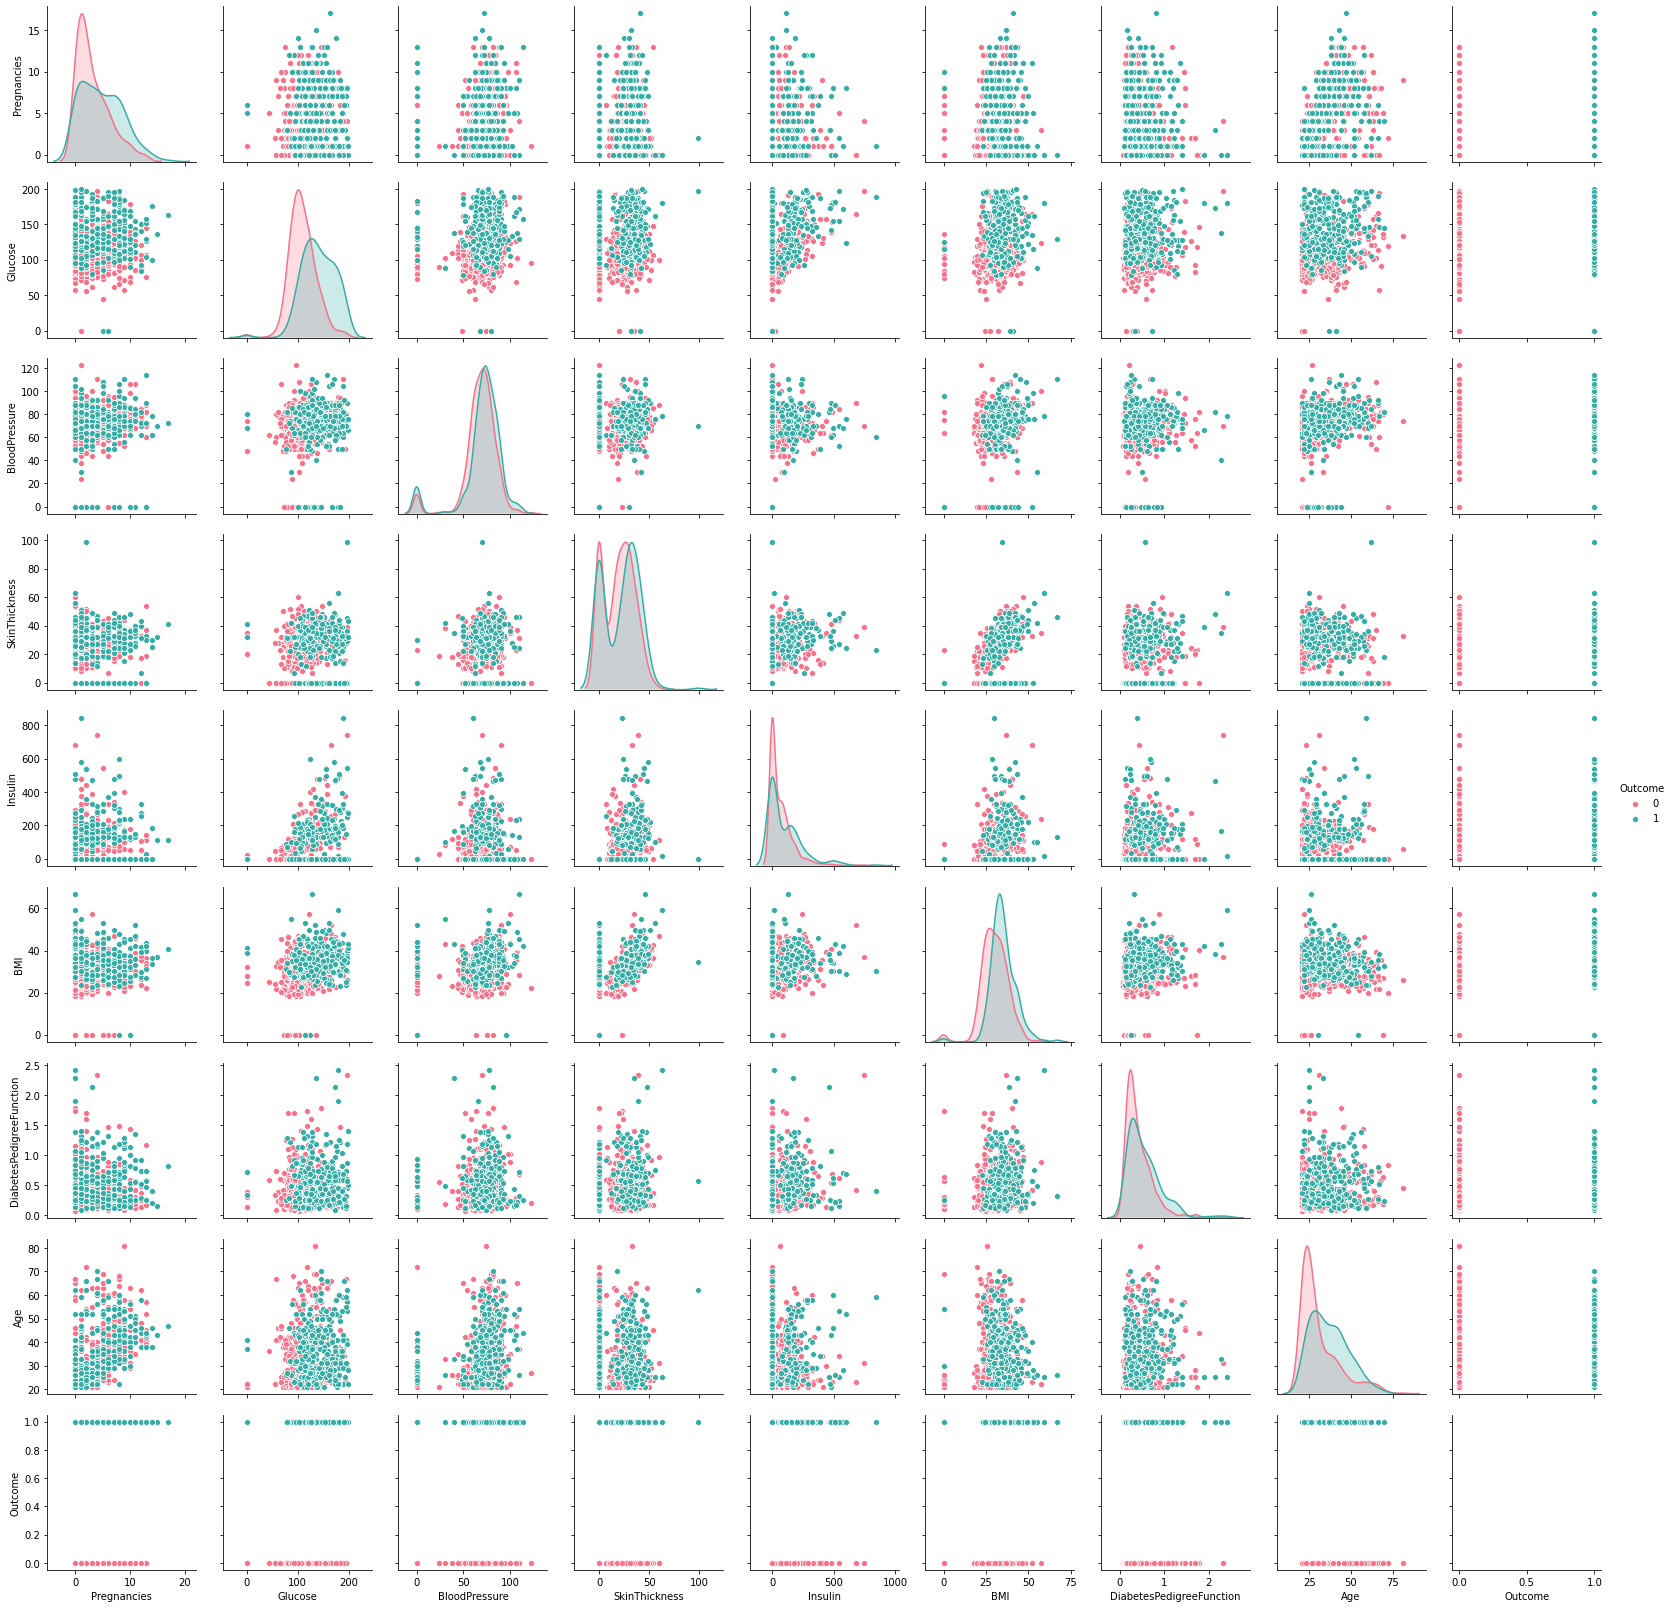

In [56]:
sns.pairplot(df, hue = "Outcome", palette = "husl")

In [57]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [58]:
x.shape

(768, 8)

In [59]:
y.shape

(768,)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [61]:
print("Number of transactions x_train: ", x_train.shape)
print("Number of transactions y_train: ", y_train.shape)
print("Number of transactions x_test: ", x_test.shape)
print("Number of transactions y_test: ", y_test.shape)

Number of transactions x_train:  (614, 8)
Number of transactions y_train:  (614,)
Number of transactions x_test:  (154, 8)
Number of transactions y_test:  (154,)


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,accuracy_score, auc

In [68]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [69]:
y_pred= model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7922077922077922

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



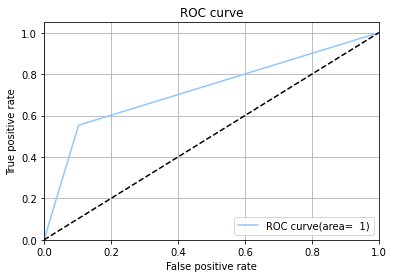

In [72]:
fpr, tpr, _= roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, label= 'ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')
plt.grid()
plt.show()

In [73]:
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
Y_pred = classifier.predict(x_test)
accuracy_score(y_test, Y_pred)

0.7922077922077922

In [75]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



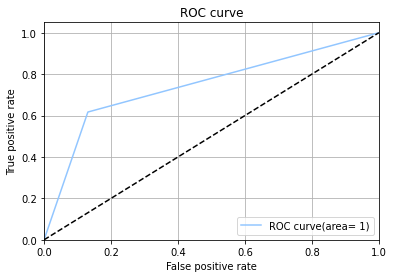

In [80]:
fpr,tpr,_= roc_curve(y_test, Y_pred)

roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area=%2.f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC curve")
plt.legend(loc= 'lower right')
plt.grid()
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
print(clf.score(x_test, y_test))

0.7402597402597403


In [83]:
y_pred= clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       107
           1       0.58      0.55      0.57        47

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



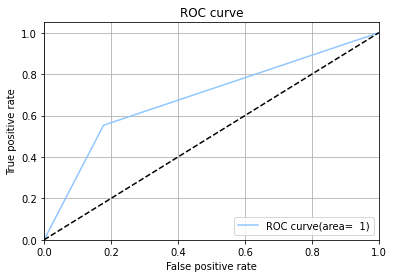

In [85]:
fpr,tpr,_ = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label= 'ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')
plt.grid()
plt.show()